In [ ]:
# Authors: Wanli (Kelvin) Cheng, Joelle Sugianto
# Class: CSCI339701 Biomedical Image Analysis
# Professor Donglai Wei

**MRI Brain Tumor Analysis Final Project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import cv2
import os
import numpy as np

zip_path = "/content/drive/My Drive/braintumor_dataset.zip"
dataset_path = "/content/braintumor_dataset"
training_path = "/content/braintumor_dataset/Training"
testing_path = "/content/braintumor_dataset/Testing"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_train = []
Y_train = []

image_size = 150

for folder in ['Training', 'Testing']:
    folder_path = os.path.join(dataset_path, folder)
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img,(image_size,image_size))
            if folder == 'Training':
                X_train.append(img)
                Y_train.append(subfolder)
            else:
                X_train.append(img)
                Y_train.append(subfolder)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

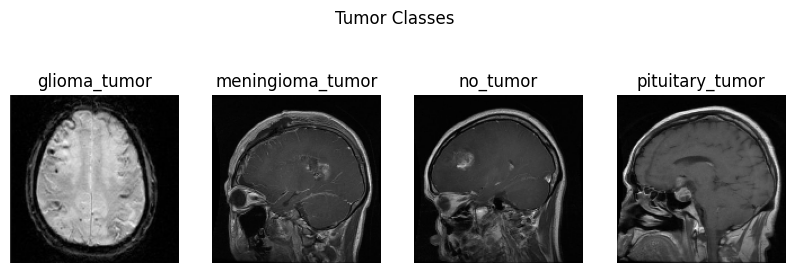

In [ ]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

fig, ax = plt.subplots(1,4,figsize=(10,10))
fig.text(s='Tumor Classes',size=12,color="black",y=0.65,x=0.45)
k = 0
for i in labels:
    j = 0
    while True :
        if Y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(Y_train[j])
            ax[k].axis('off')
            k += 1
            break
        j+=1

In [ ]:
print(X_train.size, Y_train.size)

220320000 3264


In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.2,random_state=101)

In [ ]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
def alexnet(input_shape, num_classes):
    model = keras.models.Sequential([
        keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

In [ ]:
input_shape = (150, 150, 3)
num_classes = len(np.unique(Y_train))
model = alexnet(input_shape, num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 17, 17, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
66/66 [==============================] - 189s 3s/step - loss: 2.4745 - accuracy: 0.5091 - val_loss: 21.6963 - val_accuracy: 0.1568
Epoch 2/20
66/66 [==============================] - 175s 3s/step - loss: 0.9829 - accuracy: 0.6154 - val_loss: 2.5531 - val_accuracy: 0.3499
Epoch 3/20
66/66 [==============================] - 175s 3s/step - loss: 0.8424 - accuracy: 0.6633 - val_loss: 1.6065 - val_accuracy: 0.3996
Epoch 4/20
66/66 [==============================] - 186s 3s/step - loss: 0.8420 - accuracy: 0.6729 - val_loss: 1.1068 - val_accuracy: 0.5315
Epoch 5/20
66/66 [==============================] - 174s 3s/step - loss: 0.7316 - accuracy: 0.7055 - val_loss: 1.4052 - val_accuracy: 0.5163
Epoch 6/20
66/66 [==============================] - 184s 3s/step - loss: 0.6631 - accuracy: 0.7328 - val_loss: 0.8742 - val_accuracy: 0.6539
Epoch 7/20
66/66 [==============================] - 175s 3s/step - loss: 0.5071 - accuracy: 0.8161 - val_loss: 1.6156 - val_accuracy: 0.5870
Epoch 8/20
6

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

21/21 [==============================] - 13s 604ms/step - loss: 1.1693 - accuracy: 0.8392
Test accuracy: 0.8392036557197571


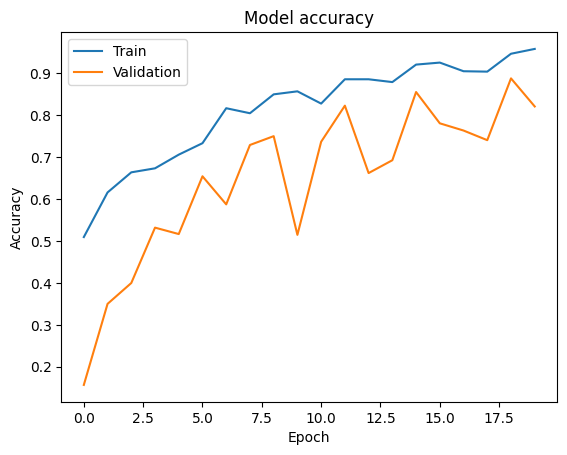

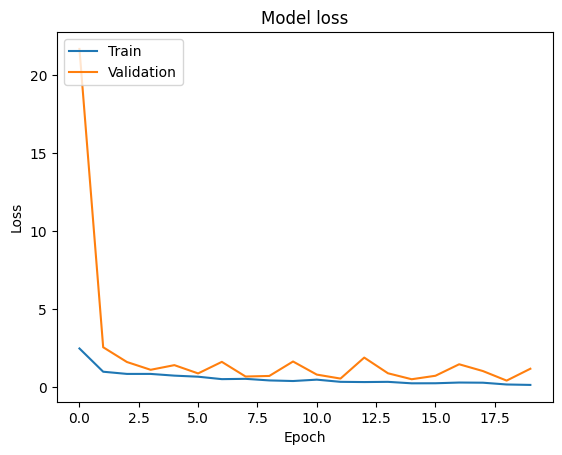

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

21/21 [==============================] - 13s 584ms/step


In [ ]:
# glioma: 0, meningioma: 1, no tumor: 2, pituitary: 3
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       184
           1       0.68      0.95      0.79       190
           2       0.87      0.92      0.90        88
           3       0.96      0.91      0.93       191

    accuracy                           0.84       653
   macro avg       0.88      0.85      0.85       653
weighted avg       0.88      0.84      0.84       653



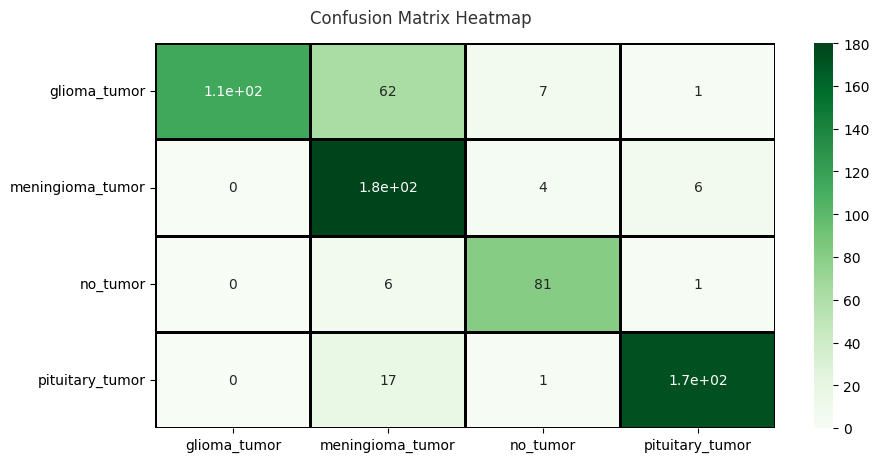

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap="Greens",linewidths=1,linecolor="black")
fig.text(s='Confusion Matrix Heatmap',size=12,color="black",y=0.92,x=0.28,alpha=0.8)

plt.show()

1/1 [==============================] - 1s 1s/step


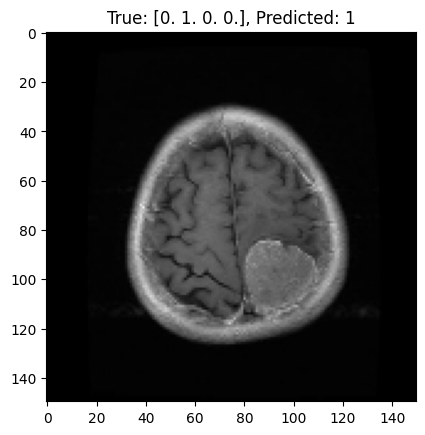

In [ ]:
# Select a random sample from the test set
idx = np.random.randint(len(X_test))
x = X_test[idx]
y_true = y_test[idx]

# Make a prediction on the sample
y_pred = model.predict(x[np.newaxis,...])
y_pred_class = np.argmax(y_pred, axis=1)

# Visualize the sample and its true/predicted label
plt.imshow(x)
plt.title(f'True: {y_true}, Predicted: {y_pred_class[0]}')
plt.show()